In [84]:
import numpy as np
import matplotlib.pylab as plt

def trapezoid(a, b, f, N):
    h = (b-a)/(N-1)
    integral = h*f(a)/2
    for i in range(N-2):
        a += h
        integral += f(a)*h
    a += h
    integral += h*f(a)/2
    return integral

def simpson(a, b, f, N):
    h = (b-a)/N
    integral = h*f(a)/3
    for i in range(N-1):
        a += h
        if i%2 == 0:
            integral += 4*f(a)*h/3
        else:
            integral += 2*f(a)*h/3
    a += h
    integral += h*f(a)/3
    return integral
                 
def gauss(a, b, f, N):
    integral = 0
    x0, w0 = np.polynomial.legendre.leggauss(N+1)
    x = (b+a)/2 + (b-a)*x0/2
    w = (b-a)*w0/2
    integral = sum(f(x)*w)
    return integral

def decay(x):
    y = np.exp(-x)
    return y

def integral(a,b):
    integral = -np.exp(-b)+np.exp(-a)
    return integral

In [104]:
er = []
er1 = []
er2 = []
x = []
t = integral(0,1)
for i in range(2,200,2):
    ex = trapezoid(0,1,decay,i)
    ex1 = simpson(0,1,decay,i)
    ex2 = gauss(0,1,decay,i)
    e = abs(t-ex)/t
    e1 = abs(t-ex1)/t
    e2 = abs(t-ex2)/t
    er.append(e)
    er1.append(e1)
    er2.append(e2)
    x.append(i)

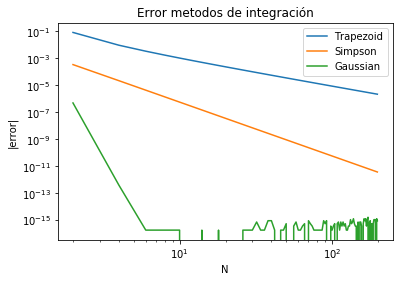

In [105]:
plt.plot(x,er,label='Trapezoid')
plt.plot(x,er1,label='Simpson')
plt.plot(x,er2,label='Gaussian')
plt.xscale('log')
plt.xlabel('N')
plt.yscale('log')
plt.ylabel('|error|')
plt.title('Error metodos de integración')
plt.legend()
plt.savefig('integrales.png')